# Microtrac S3500 Particle Size Analyzer
This notebook shows how to read all the information from the data file exported by the Microtrac S3500 Particle Size Analyzer software using the class ``MicrotracS3500``

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
from microtrac_s3500 import MicrotracS3500

In [2]:
microtracs3500_data_filename = "MTData_25_6_2021_11_24_7.csv"

In [3]:
mt = MicrotracS3500(microtracs3500_data_filename)

## Title and Sample Information

In [4]:
print(f"Title is: {mt.title}")

Title is: Particle  Size  Analysis


In [5]:
print(f"ID 1 is: {mt.id_1}")

ID 1 is: id_1


In [6]:
print(f"ID 2 is: {mt.id_2}")

ID 2 is: id_2


In [7]:
print(f"Date is: {mt.date}")

Date is: 6/25/2021


In [8]:
print(f"Database record number is: {mt.db_rec}")

Database record number is: 1030


In [9]:
print(f"Database path is: {mt.db_name}")

Database path is: C:\Microtrac\FLEX  11.1.0.8\Databases\Data.MDB


## Statistics

### MV – Mean Volume Diameter - Mean Diameter
in microns, of the Volume distribution—represents the center of gravity of the distribution. Implementation of the equation used to calculate MV will show it to be weighted (strongly influenced) by coarse particles. It is a type of "average particle size."

In [42]:
print(f"Mean Diameter of Volume Distribution is :{mt.mv} \u03BCm")

Mean Diameter of Volume Distribution is :30.07 μm


### MN – Mean Number Diameter - Mean Diameter
in microns, of the Number distribution—is calculated using the volume distribution data and is weighted to the small particles. This type of “average particle size” is related to population

In [43]:
print(f"Mean Diameter of Number Distribution is :{mt.mn} \u03BCm")

Mean Diameter of Number Distribution is :2.635 μm


### MA – Mean Area Diameter - Mean Diameter
in microns, of the Area distribution—is calculated from the volume distribution. The area mean is a type of “average” that is less weighted than MV by the presence of coarse particles, and therefore shows smaller particle size. Mean diameter represents a particle surface measurement.

In [48]:
print(f"Mean Diameter of Area Distribution is :{mt.ma} \u03BCm")

Mean Diameter of Area Distribution is :10.04 μm


### $CS$ - Calculated Specific Surface Area (m<sup>2</sup>/cm<sup>3</sup>)
provides an indication of specific surface area. The $CS$ computation assumes smooth, solid, spherical particles. It should not be interchanged with BET or other adsorption methods of surface area determination. Calculated specific surface area does not reflect porosity or unique topographic characteristics of particles.

In [52]:
print(f"Calculated Specific Surface Area is :{mt.cs} m\u00B2/cm\u00B3")

Calculated Specific Surface Area is :0.598 m²/cm³


### SD – Standard Deviation
in microns—describes the width of the measured particle size distribution. It does not provide an indication of the statistical error about the mean of multiple measurements.

In [47]:
print(f"Standard Deviation is :{mt.sd} \u03BCm")

Standard Deviation is :25.31 μm


 ### Mz – Graphic Mean
 
 $\dfrac{\text{16}^{\text{th}} + \text{50}^{\text{th}} + \text{84}^{\text{th}}}{3}$

In [15]:
print(f"Particle Diameter is :{mt.mz} \u03BCm")

Particle Diameter is :26.05 μm


In [16]:
print(f"Particle Diameter is :{mt.si} \u03BCm")

Particle Diameter is :28.38 μm


### Ski - Graphic Skewness
(((16th+84th – (2*50th)) / (2 * (84th – 16th))) +
 ((5th + 95th – (2 * 50th)) / (2 * (95th – 5th)))

In [17]:
print(f"Particle Diameter is :{mt.ski} \u03BCm")

Particle Diameter is :0.676 μm


### Kg – Graphic Kurtosis
(95th – 5th) / (2.44 * (75th – 25th))

In [18]:
print(f"Graphic Kurtosis is :{mt.kg} \u03BCm")

Particle Diameter is :1.454 μm


o SDg – Graphic Standard Deviation = ((84th – 16th) / 4) + ((95th – 5th) / 6.6)
o 


## Get Percentiles

In [19]:
mt.df_percentiles

,%Tile,Size(um)
1,10.0,4.39
2,20.0,6.72
3,30.0,9.17
4,40.0,12.12
5,50.0,15.94
6,60.0,21.40
7,70.0,30.31
8,80.0,46.53
9,90.0,77.44


## Get Particle Size Distribution
Returns a pandas dataframe of the particle size distribution

In [20]:
mt.psd

,Size(um),%Chan,%Pass
1,60.0,3.70,85.22
2,50.0,2.24,81.52
3,45.0,0.48,79.28
4,44.0,2.12,78.80
5,40.0,6.94,76.68
6,30.0,5.00,69.74
7,25.0,6.91,64.74
8,20.0,10.03,57.83
9,15.0,8.14,47.79
10,12.0,6.59,39.65


## Plot of the Particle Size Distribution using Matplotlib

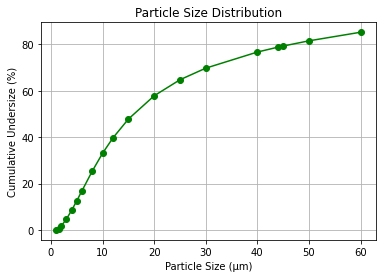

In [38]:
plt.plot(mt.psd["Size(um)"], mt.psd["%Pass"], "-og")
plt.title("Particle Size Distribution")
plt.xlabel("Particle Size (\u03BCm)")
plt.ylabel("Cumulative Undersize (%)")
plt.grid(visible=True)
plt.show()


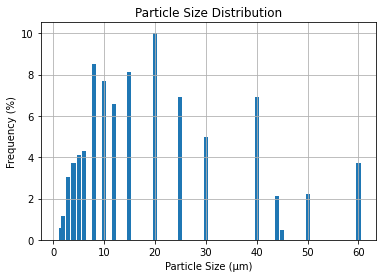

In [39]:
plt.bar(mt.psd["Size(um)"], mt.psd["%Chan"])
plt.title("Particle Size Distribution")
plt.xlabel("Particle Size (\u03BCm)")
plt.ylabel("Frequency (%)")
plt.grid(visible=True)
plt.show()


## References
1. Microtrac FLEX Software Operations Manual, Microtrac Inc.